# Linear regression in JAX
## Replicating code from google documentation

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import grad

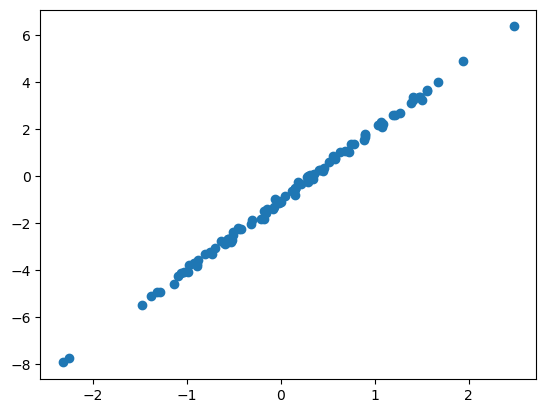

In [2]:
xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys);

In [3]:
# Defining our model for training
# theta - parameters
# x - input data
def model(theta, x):
    w, b = theta
    return w*x + b

In [5]:
# Loss function - squared error
def loss_fn(theta, x, y):
    prediction = model(theta, x)
    return jnp.mean((prediction-y)**2)

In [13]:
# Optimising using grad descent
def update(theta, x, y, lr=0.1):
    grad_loss = grad(loss_fn)
    return theta - lr * grad_loss(theta, x, y)

w: 3.00, b: -1.01


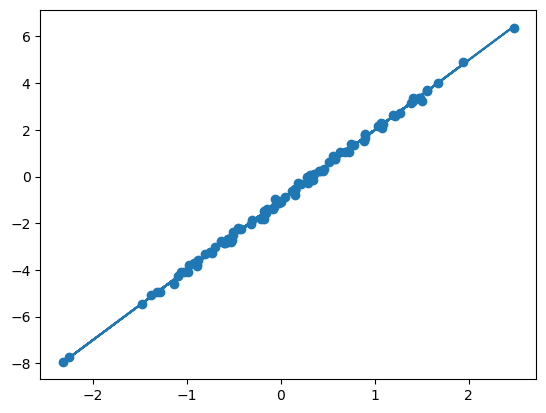

In [14]:
theta = jnp.array([1., 1.])

for _ in range(1000):
    theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")